In [1]:
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical

# Reading data

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
display(df.max())

Time      172792.000000
V1             2.454930
V2            22.057729
V3             9.382558
V4            16.875344
V5            34.801666
V6            73.301626
V7           120.589494
V8            20.007208
V9            15.594995
V10           23.745136
V11           12.018913
V12            7.848392
V13            7.126883
V14           10.526766
V15            8.877742
V16           17.315112
V17            9.253526
V18            5.041069
V19            5.591971
V20           39.420904
V21           27.202839
V22           10.503090
V23           22.528412
V24            4.584549
V25            7.519589
V26            3.517346
V27           31.612198
V28           33.847808
Amount     25691.160000
Class          1.000000
dtype: float64

In [4]:
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# checking values if null or empty

In [5]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [6]:
np.where(df.empty)

(array([], dtype=int64),)

# Coverting data type and splitting

In [7]:
df=df.astype('float64')

In [8]:
train_data=df[0:199364]
train_targets=train_data.iloc[0:199364,[30]]
train_data=train_data.drop(["Class"],axis=1)

In [9]:
test_data=df[199365:284807]
test_targets=test_data.iloc[0:85443,[30]]
test_data=test_data.drop(["Class"],axis=1)

# normalizing data

In [10]:
train_mean = train_data.mean(axis=0) 
train_data -= train_mean
train_std = train_data.std(axis=0)
train_data /= train_std
test_data -= train_mean
test_data /= train_std

# Network structure

In [11]:
from keras import models
from keras import layers
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(18, activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(train_data.shape[1],)))
model.add(layers.Dense(15, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(6, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

# model training

In [13]:
history=model.fit(train_data, train_targets, epochs=30,validation_split = 0.3,verbose=1)

Epoch 1/30
4362/4362 [==============================] - 13s 3ms/step - loss: 0.0202 - accuracy: 0.9981 - val_loss: 0.0073 - val_accuracy: 0.9980
Epoch 2/30
4362/4362 [==============================] - 12s 3ms/step - loss: 0.0080 - accuracy: 0.9983 - val_loss: 0.0065 - val_accuracy: 0.9989
Epoch 3/30
4362/4362 [==============================] - 12s 3ms/step - loss: 0.0077 - accuracy: 0.9985 - val_loss: 0.0064 - val_accuracy: 0.9991
Epoch 4/30
4362/4362 [==============================] - 12s 3ms/step - loss: 0.0073 - accuracy: 0.9986 - val_loss: 0.0056 - val_accuracy: 0.9992
Epoch 5/30
4362/4362 [==============================] - 12s 3ms/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.0066 - val_accuracy: 0.9990
Epoch 6/30
4362/4362 [==============================] - 13s 3ms/step - loss: 0.0072 - accuracy: 0.9986 - val_loss: 0.0063 - val_accuracy: 0.9990
Epoch 7/30
4362/4362 [==============================] - 14s 3ms/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0080 - val_ac

# training and validationloss

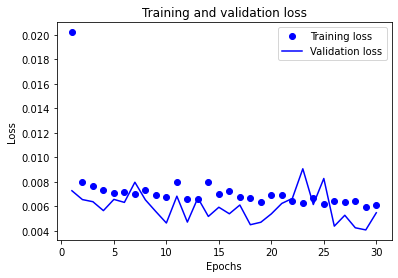

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,30 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# model accuracy plot

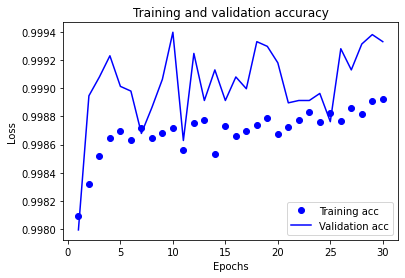

In [15]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# model evaluate

In [16]:
loss, accuracy = model.evaluate(test_data, test_targets)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0049 - accuracy: 0.9996


In [19]:
c=np.array(test_data.iloc[30])
a=c.reshape(1,30)
display(a)
display(test_targets.iloc[30])
model.predict(a)

array([[ 1.81139627, -0.41405686,  0.07745822, -0.19857464, -1.11031674,
         2.69727838,  2.73164138,  0.73399304,  0.35639734, -0.12064331,
        -0.36812766, -0.12005075, -0.09991732, -0.49519742, -0.06788768,
         0.43376244, -1.04338744, -0.40403288, -0.70064784,  0.84667175,
         0.11978611, -0.45953285, -0.87535973, -0.07291047,  1.11563493,
         1.36387019, -0.76636248, -0.92994584, -1.36799131, -0.29866502]])

Class    0.0
Name: 199395, dtype: float64

array([[0.00161538]], dtype=float32)